<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Financial%20Daily%20Returns%2C%20QQ%20plots%2C%20Correlation%20Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-1

For this assignment, we will focus on Apple and Microsoft stock prices data from the S&P-500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. You'll analyze these stock prices. These companies are listed under the stock ticker `aapl` and `msft`."

1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD). (15 pts)

In [ ]:
#Resource https://algotrading101.com/learn/yahoo-finance-api-guide/
import pandas as pd
!pip install yahoo_fin --upgrade
from yahoo_fin.stock_info import get_data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Daily Closing Price for Apple in 2020
aapl_daily= get_data("aapl", start_date="01/01/2020", end_date="01/01/2021", index_as_date = True, interval="1d")
aapl_daily
aapl_daily['close']

2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: close, Length: 253, dtype: float64

In [ ]:
#Daily Closing Price for Microsoft in 2020
msft_daily= get_data("msft", start_date="01/01/2020", end_date="01/01/2021", index_as_date = True, interval="1d")
msft_daily
msft_daily['close']

2020-01-02    160.619995
2020-01-03    158.619995
2020-01-06    159.029999
2020-01-07    157.580002
2020-01-08    160.089996
                 ...    
2020-12-24    222.750000
2020-12-28    224.960007
2020-12-29    224.149994
2020-12-30    221.679993
2020-12-31    222.419998
Name: close, Length: 253, dtype: float64

2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (15 pts)

Text(0.5, 1.0, 'Closing Price of Microsoft and Apple in 2020')

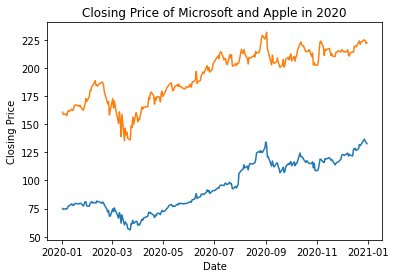

In [ ]:
#Line Graph of Closing Prices for Apple and Microsoft in 2020
import matplotlib.pyplot as plt
import numpy as np
plt.plot(aapl_daily['close'])
plt.plot(msft_daily['close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price of Microsoft and Apple in 2020")

The closing prices of both Microsoft and Apple hit their all time low  at the beginning of the COVID-19 pandemic (March 2020).  After that, the closing prices have been on a steady recovery, besting the price of January 2020 and reaching its all time high at the beginning of September 2020. 

3. Calculate stock return of Apple and Microsoft in this period. (15 pts)

In [ ]:
#Resource Main_Financial_Concepts.ipynb
#Daily stock return for Apple
aapl_daily['return'] = np.log(aapl_daily['close']) - np.log(aapl_daily['close'].shift(1))
aapl_daily['return']

2020-01-02         NaN
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
                ...   
2020-12-24    0.007683
2020-12-28    0.035141
2020-12-29   -0.013404
2020-12-30   -0.008563
2020-12-31   -0.007732
Name: return, Length: 253, dtype: float64

In [ ]:
#Daily stock return for Microsoft
msft_daily ['return'] = np.log(msft_daily['close']) - np.log(msft_daily['close'].shift(1))
msft_daily ['return']

2020-01-02         NaN
2020-01-03   -0.012530
2020-01-06    0.002581
2020-01-07   -0.009160
2020-01-08    0.015803
                ...   
2020-12-24    0.007797
2020-12-28    0.009873
2020-12-29   -0.003607
2020-12-30   -0.011081
2020-12-31    0.003333
Name: return, Length: 253, dtype: float64

4. What is the largest return of these companies during this period? (15 pts)

In [ ]:
#Largest return for Apple in 2020
aapl_daily['return'].max()

0.11315748006946968

In [ ]:
#Largest return for Microsoft in 2020
msft_daily ['return'].max()

0.13292898226108107

5. Draw the histogram of the returns and interpret the distributions you obtained. (15 pts)

Text(0.5, 1.0, 'Return Data for Apple (2020)')

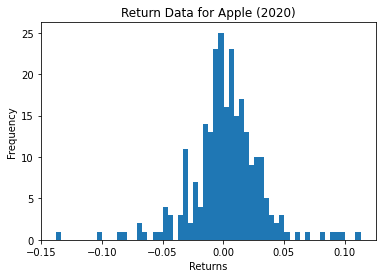

In [ ]:
#Resource Main_Financial_Concepts.ipynb
#Histogram for Apple Returns in 2020
aapl_daily['return'].plot.hist(bins=60)
plt.xlabel("Returns")
plt.title("Return Data for Apple (2020)")

Text(0.5, 1.0, 'Return Data for Microsoft (2020)')

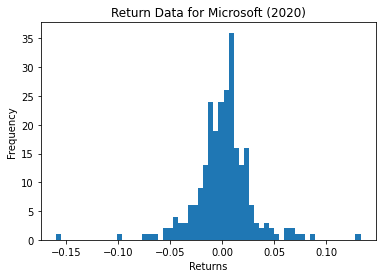

In [ ]:
#Histogram for Microsoft Returns in 2020
msft_daily ['return'].plot.hist(bins=60)
plt.xlabel("Returns")
plt.title("Return Data for Microsoft (2020)")

Looking at the histograms, a majority of the data points are focused in the middle of the graph (0% return).  Both companies have had more positive stock returns than negative in 2020.  

6. Use QQ plot and see if the stock returns follow normal distribution. (15 pts)

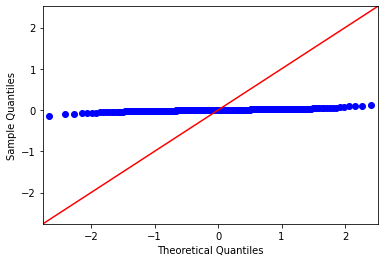

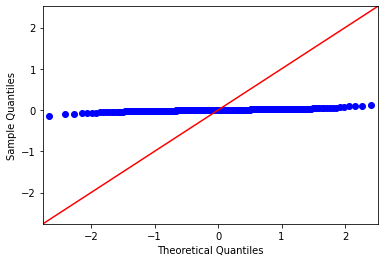

In [ ]:
#Resource https://www.statology.org/q-q-plot-python/
#QQ plot for Apple Returns
import statsmodels.api as sm
import pylab as py
sm.qqplot(aapl_daily['return'], line='45')

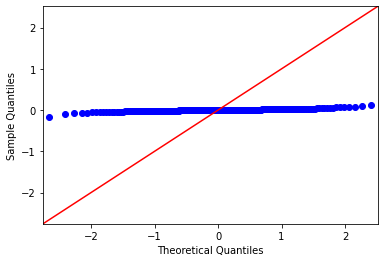

In [ ]:
#QQ plot for Microsoft Returns
sm.qqplot(msft_daily ['return'], line='45')
plt.show()

According to the QQ plots above, the return data for Apple and Microsoft is not normally distributed.

7. Calculate the correlation coefficient between these stock returns and interpret. (10 pts)

In [ ]:
#Resource https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/
aapl_daily['return'].corr(msft_daily ['return'])

0.8435492297755272

The correlation coefficient of .84 means there is a strong positive relationship between the 2020 stock returns of Apple and Microsoft.